Llamamos la paquetería necesaria

Checa `taylorinteg(...,trange)` e implementa Taylor para buscar

In [1]:
using TaylorIntegration, ValidatedNumerics, TaylorSeries
using Plots, LaTeXStrings
# plotly()
pyplot(grid = :false, legend = :false)
const λ = 1.0
const Z = 2.0
const order = 30
const t0 = 0.0
const t_max = 0.5 
const abs_tol = 1.0E-20
const steps = 500000

500000

In [2]:
function undrivenHelium(τ, q)
    t, Q₁, Q₂, P₁, P₂ = q
    
    t1 = Q₁^2
    t2 = Q₂^2
    t = t1 * t2
    R12 = t1 - t2
    q₁ = 0.25*t2*P₁
    p₁ = 2Q₁*(-0.125P₂^2 + Z  - t2 - t2/abs(R12) + t*R12/abs(R12)^3)
    q₂ = 0.25*t1*P₂
    p₂ = 2Q₂*(-0.125P₁^2 + Z  - t1 - t1/abs(R12) - t*R12/abs(R12)^3)

    return [t, q₁, q₂, p₁, p₂] 

end
undrivenHelium(v) = undrivenHelium(0, v)


var1 = set_variables("t q1 q2 p1 p2", order = 1)


function condini(x10::Float64, px10::Float64)
    @assert x10 != 0
    Q1 = sqrt(x10)
    Q2 = 0.0
    P1 = px10*sqrt(x10)    
    P2 = sqrt(8Z)    
    return [0, Q1, Q2, P1, P2]
end

function regHam(t, Q₁, Q₂, P₁, P₂)
    #Cantidades auxiliares
    P₁² = P₁^2
    P₂² = P₂^2
    Q₁² = Q₁^2
    Q₂² = Q₂^2
    nf = abs(Q₁² - Q₂²)
    
    H = 0.125*(P₁²*Q₂² + P₂²*Q₁²) - Z*(Q₁² + Q₂²) + Q₁²*Q₂²*(1.0 + 1.0/nf)
    return H
end


regHam(v) = regHam(v...)

regHam (generic function with 2 methods)

In [3]:
function errHam(N::Int)
    srand(487293456)
    J = [0 0 0 0 0; 0 0 0 1 0; 0 0 0 0 1; 0 -1 0 0 0; 0 0 -1 0 0 ]
    
    dnorm = zeros(N)
    
    for j in 1:N
        al = 10*rand(5)
        alt = al + var1
        ene = J*∇(regHam(alt))
        ene1 = [ene[k].coeffs[1].coeffs[1] for k in 1:5]
        meq = undrivenHelium(al)
        meq[1] = 0
        dnorm[j] = norm(meq - ene1) 
    end
    return dnorm  
end


errHam (generic function with 1 method)


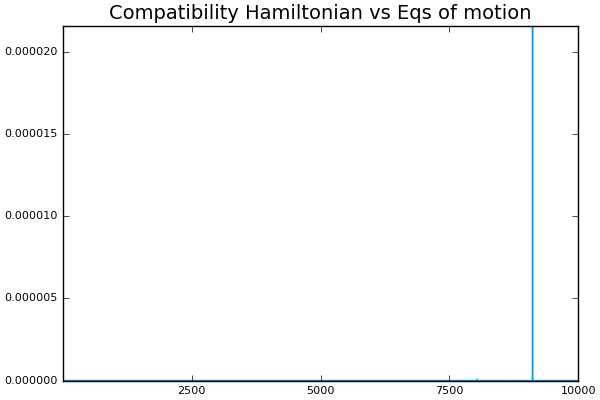

In [4]:
dnorm = errHam(10_000);
plot(eachindex(dnorm), dnorm, title = "Compatibility Hamiltonian vs Eqs of motion")

In [5]:
maximum(dnorm)

2.1579186437577746e-5

In [6]:
#Haremos malavares con metaprogramming para ver varias órbitas
nombret(n::Int) = Symbol( string("t", n) )
nombreq(n::Int) = Symbol( string("q", n) )

function orbits(rs = 2:10)
    N = length(rs)
    # Checo que `n` sea >= 1
    @assert N >= 0  

    for j = 1:N
        ex = quote 
                $(nombret(j)), $(nombreq(j)) = 
                taylorinteg(undrivenHelium, condini(Float64($(rs[j])), 0.0), t0, 
                15.0, order, abs_tol, maxsteps=steps) 
             end
        eval(ex)  
    end
end

orbits (generic function with 2 methods)

The final state:

In [7]:
orbits()

In [8]:
t1[end], q1[end,:]

(15.0,[12694.2,94.5674,1.23488,133.038,-0.885372])

In [9]:
regHam(q1[end,:])

2.2919266484677792e-10

In [10]:
ene = zeros(t1)
for j in eachindex(ene)
    ene[j] = abs(regHam(q1[j,:]))
end


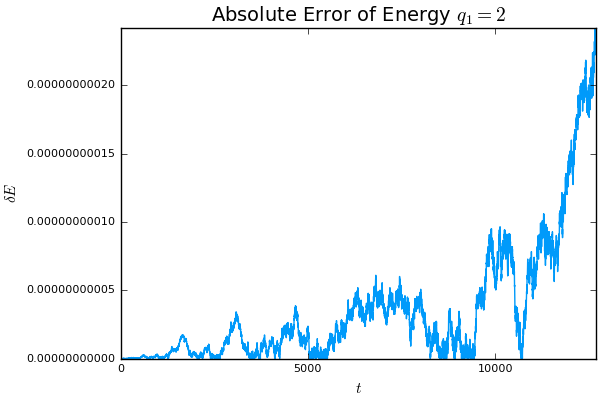

In [11]:
plot(q1[:,1], ene, title =L"Absolute Error of Energy $q_1=2$")
xlabel!(L"t")
ylabel!(L"\delta E")

In [12]:
function ksv(Q, P)
    v₁ = P/Q
    return v₁
end
ks(Q) = Q^2

ks (generic function with 1 method)

In [16]:
xs1 = map(ks, q1[:,2])
vxs1 = Float64[ksv(q1[j,2], q1[j, 4]) for j in eachindex(t1)]
xs2 = map(ks, q2[:,2])
vxs2 = Float64[ksv(q2[j,2], q2[j, 4]) for j in eachindex(t2)]
xs3 = map(ks, q3[:,2])
vxs3 = Float64[ksv(q3[j,2], q3[j, 4]) for j in eachindex(t3)]
xs4 = map(ks, q4[:,2])
vxs4 = Float64[ksv(q4[j,2], q4[j, 4]) for j in eachindex(t4)]
xs5 = map(ks, q5[:,2])
vxs5 = Float64[ksv(q5[j,2], q5[j, 4]) for j in eachindex(t5)]
xs6 = map(ks, q6[:,2])
vxs6 = Float64[ksv(q6[j,2], q6[j, 4]) for j in eachindex(t6)]
xs7 = map(ks, q7[:,2])
vxs7 = Float64[ksv(q7[j,2], q7[j, 4]) for j in eachindex(t7)]
xs8 = map(ks, q8[:,2])
vxs8 = Float64[ksv(q8[j,2], q8[j, 4]) for j in eachindex(t8)]
xs9 = map(ks, q9[:,2])
vxs9 = Float64[ksv(q9[j,2], q9[j, 4]) for j in eachindex(t9)];


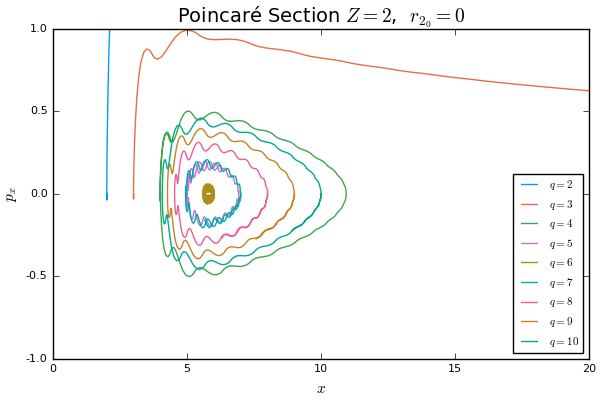

In [17]:
plot(xs1, vxs1, label = L"q = 2", title = L"Poincaré Section $Z = 2$,  $r_{2_0} =0$", legend =:true)
plot!(xs2, vxs2, label = L"q = 3")
plot!(xs3, vxs3, label = L"q = 4")
plot!(xs4, vxs4, label = L"q = 5")
plot!(xs5, vxs5, label = L"q = 6")
plot!(xs6, vxs6, label = L"q = 7")
plot!(xs7, vxs7, label = L"q = 8")
plot!(xs8, vxs8, label = L"q = 9")
plot!(xs9, vxs9, label = L"q = 10")
xaxis!([0,20])
xlabel!(L"x")
ylabel!(L"p_x")
yaxis!([-1,1])

In [15]:
function HamU(t, Q₁, P₁, Q₂, P₂)
    #Cantidades auxiliares
    P₁² = P₁^2
    P₂² = P₂^2
    Q₁² = Q₁^2
    Q₂² = Q₂^2
    nq = abs(Q₁ - Q₂)
    
    H = 0.5*(P₁² + P₂²) - Z*(1/abs(Q₁)+1/abs(Q₂)) + 1.0/nq
    return H
end
HamU(v) = HamU(v...)

HamU (generic function with 2 methods)

In [ ]:
ene1 = zeros(t1)
for j in 2:length(t1)
    ene1[j] = abs(HamU(q1[j,:]) + 1)
end

In [ ]:
plot(q1[:,1], ene1, title ="Error de energía, espacio de configuración original")
xlabel!(L"t")
ylabel!(L"\delta E")